# 3. Undersampling and Oversampling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from imblearn import over_sampling, under_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedShuffleSplit, train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score, make_scorer, confusion_matrix, average_precision_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import fraudutils as futils
from fraudutils import classify
import warnings

warnings.filterwarnings(action='once')

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
train, test, _ = futils.load_train_test_val_dataset('../../../data/processed/give-me-some-credit/')

X_train = train.drop(['SeriousDlqin2yrs'], axis=1)
y_train = train['SeriousDlqin2yrs']

X_test = test.drop(['SeriousDlqin2yrs'], axis=1)
y_test = test['SeriousDlqin2yrs']

In [3]:
print("Train Data:")
print("Non-fraudulent: {}".format(len([x for x in y_train if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_train if x == 1])))

print("\nTest Data:")
print("Non-fraudulent: {}".format(len([x for x in y_test if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_test if x == 1])))

Train Data:
Non-fraudulent: 83984
Fraudulent: 6016

Test Data:
Non-fraudulent: 41992
Fraudulent: 3008


In [4]:
logistic_regression_scores = {}
decision_tree_scores = {}
naive_bayes_scores = {}
knn_scores = {}

## No sampling applied

Logistic regression results:
Mean accuracy: 0.9333111111111111
Mean precision: 0.5421686746987951
Mean recall: 0.014960106382978724
AUPRC: 0.073955345495457
AUROC: 0.507027586054892


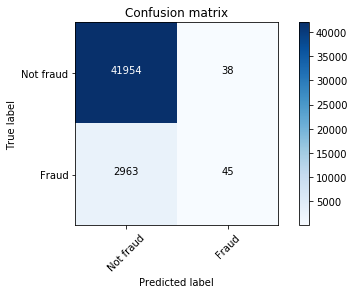

Decision tree results:
Mean accuracy: 0.8968222222222222
Mean precision: 0.25279709706682796
Mean recall: 0.2779255319148936
AUPRC: 0.1185254343355058
AUROC: 0.6095404950487023


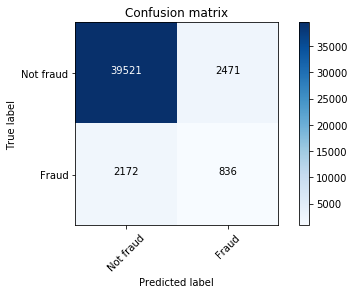

Naive Bayes results:
Mean accuracy: 0.9322222222222222
Mean precision: 0.390625
Mean recall: 0.024933510638297872
AUPRC: 0.07491743037086289
AUROC: 0.5110736328196253


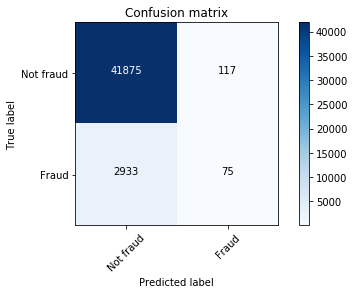

KNN results:
Mean accuracy: 0.9333555555555556
Mean precision: 0.5064935064935064
Mean recall: 0.11668882978723404
AUPRC: 0.11814657901200454
AUROC: 0.5542722106642399


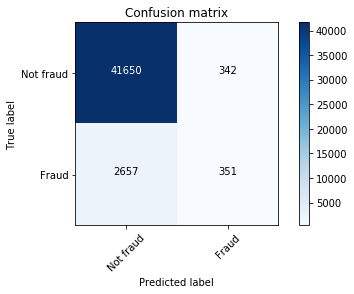

In [5]:
print("Logistic regression results:")
logistic_regression_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=LogisticRegression(), normalized=False)
print("Decision tree results:")
decision_tree_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=GaussianNB(), normalized=False)
print("KNN results:")
knn_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=KNeighborsClassifier(), normalized=False)

## Oversampling: Random

In [6]:
ros = over_sampling.RandomOverSampler(random_state=0)
X_oversampled, y_oversampled = ros.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.7375555555555555
Mean precision: 0.15734973528495796
Mean recall: 0.671875
AUPRC: 0.12765268672791447
AUROC: 0.7070677152791008


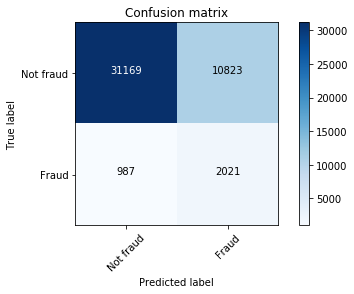

Decision tree results:
Mean accuracy: 0.9008888888888889
Mean precision: 0.2557200538358008
Mean recall: 0.2526595744680851
AUPRC: 0.11456567554066481
AUROC: 0.599991437072107


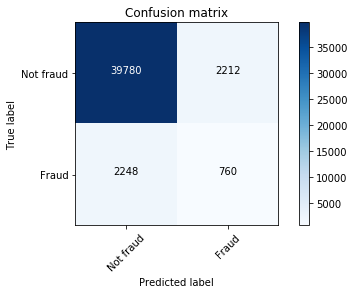

Naive Bayes results:
Mean accuracy: 0.9297555555555556
Mean precision: 0.34911242603550297
Mean recall: 0.05884308510638298
AUPRC: 0.08345396330801405
AUROC: 0.52549222268274


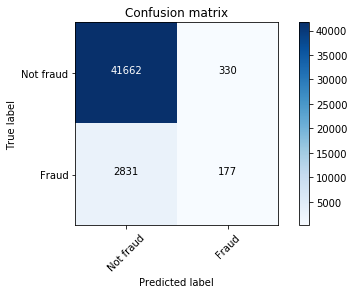

KNN results:
Mean accuracy: 0.8501555555555556
Mean precision: 0.1941031941031941
Mean recall: 0.3939494680851064
AUPRC: 0.1169779611816846
AUROC: 0.6383921468830942


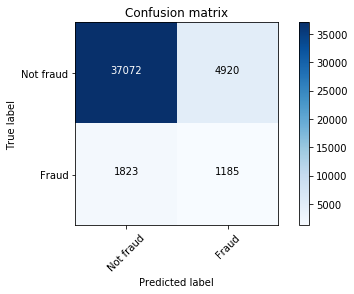

In [7]:
print("Logistic regression results:")
logistic_regression_scores['random_os'] = classify(X_oversampled,
                                                     X_test,
                                                     y_oversampled,
                                                     y_test,
                                                     classifier=LogisticRegression(),
                                                     normalized=False)
print("Decision tree results:")
decision_tree_scores['random_os'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['random_os'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=GaussianNB(), normalized=False)
print("KNN results:")
knn_scores['random_os'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=KNeighborsClassifier(), normalized=False)

## Oversampling: SMOTE

In [8]:
smote = over_sampling.SMOTE(random_state=0)
X_oversampled, y_oversampled = smote.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.7193777777777778
Mean precision: 0.15008002327949949
Mean recall: 0.6858377659574468
AUPRC: 0.12393054788085353
AUROC: 0.7038090525348293


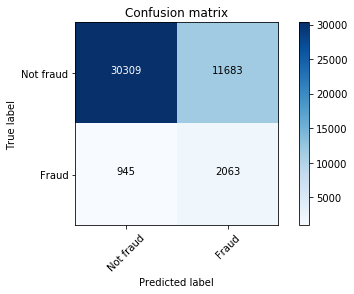

Decision tree results:
Mean accuracy: 0.8799111111111111
Mean precision: 0.21408114558472555
Mean recall: 0.29820478723404253
AUPRC: 0.11075113358102427
AUROC: 0.6098925441218793


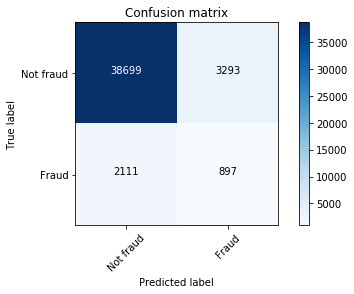

Naive Bayes results:
Mean accuracy: 0.9232444444444444
Mean precision: 0.3198707592891761
Mean recall: 0.13164893617021275
AUPRC: 0.10015508961682268
AUROC: 0.5557987489004997


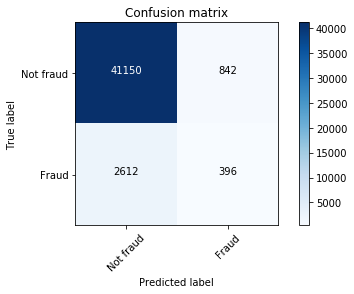

KNN results:
Mean accuracy: 0.8468888888888889
Mean precision: 0.20330174258636502
Mean recall: 0.4421542553191489
AUPRC: 0.12717961948724843
AUROC: 0.6590176877662615


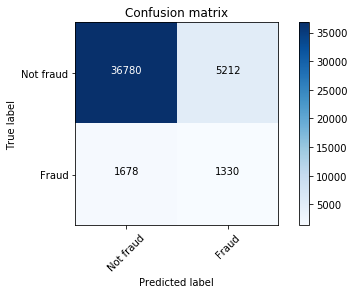

In [9]:
print("Logistic regression results:")
logistic_regression_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=LogisticRegression(), normalized=False)
print("Decision tree results:")
decision_tree_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=GaussianNB(), normalized=False)
print("KNN results:")
knn_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=KNeighborsClassifier(), normalized=False)


## Oversampling: ADASYN

In [10]:
adasyn = over_sampling.ADASYN(random_state=0)
X_oversampled, y_oversampled = adasyn.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.6644666666666666
Mean precision: 0.1326933592563339
Mean recall: 0.726063829787234
AUPRC: 0.11465495972009823
AUROC: 0.6930590629218129


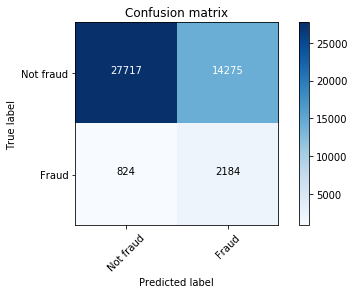

Decision tree results:
Mean accuracy: 0.8805555555555555
Mean precision: 0.21774385881230623
Mean recall: 0.3035239361702128
AUPRC: 0.11264602865915782
AUROC: 0.6127069099788004


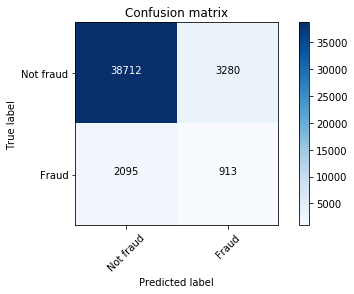

Naive Bayes results:
Mean accuracy: 0.8348888888888889
Mean precision: 0.17494854454572184
Mean recall: 0.39561170212765956
AUPRC: 0.1096116914924897
AUROC: 0.6309835992063331


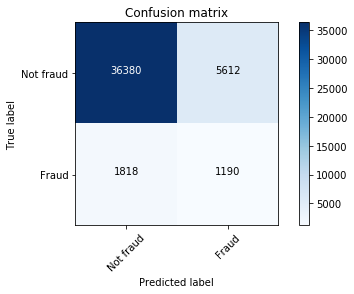

KNN results:
Mean accuracy: 0.8416888888888889
Mean precision: 0.19779735682819383
Mean recall: 0.4478058510638298
AUPRC: 0.12548592482373647
AUROC: 0.6588548211310766


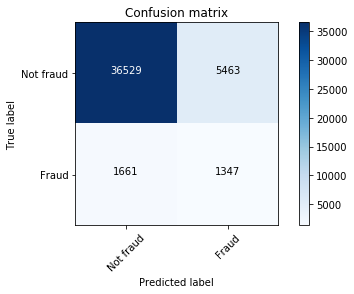

In [11]:
print("Logistic regression results:")
logistic_regression_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=LogisticRegression(), normalized=False)
print("Decision tree results:")
decision_tree_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=GaussianNB(), normalized=False)
print("KNN results:")
knn_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=KNeighborsClassifier(), normalized=False)

## Undersampling: Random

In [12]:
rus = under_sampling.RandomUnderSampler(random_state=0)
X_undersampled, y_undersampled = rus.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.6347333333333334
Mean precision: 0.11790815455528367
Mean recall: 0.6888297872340425
AUPRC: 0.10201864901547465
AUROC: 0.6598440229749942


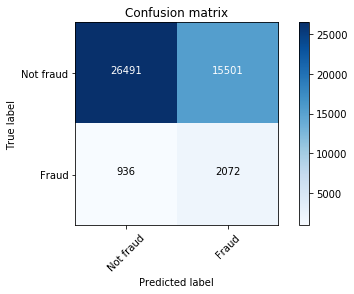

Decision tree results:
Mean accuracy: 0.6940888888888889
Mean precision: 0.13991163475699558
Mean recall: 0.694813829787234
AUPRC: 0.1176125387773008
AUROC: 0.6944253946040381


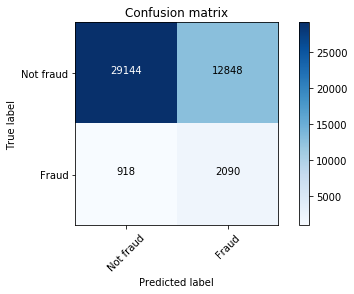

Naive Bayes results:
Mean accuracy: 0.9311333333333334
Mean precision: 0.3732590529247911
Mean recall: 0.04454787234042553
AUPRC: 0.0804945633062684
AUROC: 0.5195948544403595


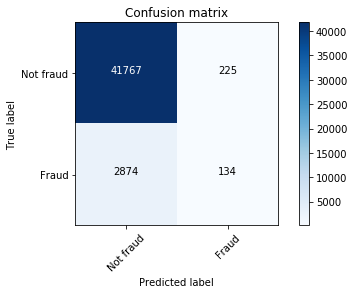

KNN results:
Mean accuracy: 0.7537111111111111
Mean precision: 0.1511879049676026
Mean recall: 0.581781914893617
AUPRC: 0.11591394441636158
AUROC: 0.6739043885765476


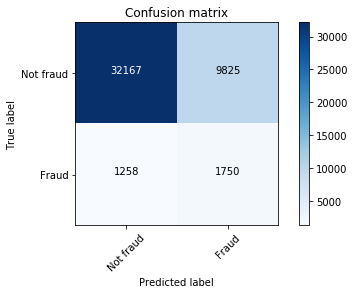

In [13]:
print("Logistic regression results:")
logistic_regression_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=LogisticRegression(), normalized=False)
print("Decision tree results:")
decision_tree_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=GaussianNB(), normalized=False)
print("KNN results:")
knn_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=KNeighborsClassifier(), normalized=False)

## Scores

### Logistic regression scores

In [14]:
logistic_regression_df = pd.DataFrame(logistic_regression_scores)
logistic_regression_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.073955,0.127653,0.123931,0.114655,0.102019
AUROC,0.507028,0.707068,0.703809,0.693059,0.659844
accuracy,0.933311,0.737556,0.719378,0.664467,0.634733
precision,0.542169,0.157350,0.150080,0.132693,0.117908
recall,0.014960,0.671875,0.685838,0.726064,0.688830


### Decision tree scores

In [15]:
decision_tree_df = pd.DataFrame(decision_tree_scores)
decision_tree_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.118525,0.114566,0.110751,0.112646,0.117613
AUROC,0.609540,0.599991,0.609893,0.612707,0.694425
accuracy,0.896822,0.900889,0.879911,0.880556,0.694089
precision,0.252797,0.255720,0.214081,0.217744,0.139912
recall,0.277926,0.252660,0.298205,0.303524,0.694814


### Naive Bayes scores

In [16]:
naive_bayes_df = pd.DataFrame(naive_bayes_scores)
naive_bayes_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.074917,0.083454,0.100155,0.109612,0.080495
AUROC,0.511074,0.525492,0.555799,0.630984,0.519595
accuracy,0.932222,0.929756,0.923244,0.834889,0.931133
precision,0.390625,0.349112,0.319871,0.174949,0.373259
recall,0.024934,0.058843,0.131649,0.395612,0.044548


### KNN scores

In [17]:
knn_df = pd.DataFrame(knn_scores)
knn_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.118147,0.116978,0.127180,0.125486,0.115914
AUROC,0.554272,0.638392,0.659018,0.658855,0.673904
accuracy,0.933356,0.850156,0.846889,0.841689,0.753711
precision,0.506494,0.194103,0.203302,0.197797,0.151188
recall,0.116689,0.393949,0.442154,0.447806,0.581782
